In [1]:
!pip install pyLDAvis

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 2.6/2.6 MB 41.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 17.6/17.6 MB 74.0 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 12.3/12.3 MB 88.6 MB/s eta 0:00:00
  Attempting uninstall: numpy
    Found existing installation: numpy 1.22.4
    Uninstalling numpy-1.22.4:
      Successfully uninstalled numpy-1.22.4
  Attempting uninstall: pandas
    Found existing installation: pandas 1.5.3
    Uninstalling pandas-1.5.3:
      Successfully uninstalled pandas-1.5.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
google-colab 1.0.0 requires pandas==1.5.3, but you have pandas 2.0.2 which is incompatible.
numba 0.56.4 requires numpy<1.24,>=1.18, but you have numpy 1.25.0 which is incompatible.


In [25]:
import pandas as pd
from gensim.models import TfidfModel
import numpy as np
import gensim.corpora as corpora
from gensim.models import CoherenceModel
from gensim.models.ldamodel import LdaModel
from gensim.models.ldamulticore import LdaMulticore
from sklearn.model_selection import GridSearchCV
from tqdm import tqdm
import gensim
from gensim.test.utils import get_tmpfile
import pyLDAvis
import pyLDAvis.gensim
import matplotlib.pyplot as plt
from ast import literal_eval
%matplotlib inline
from wordcloud import WordCloud, STOPWORDS
import matplotlib.colors as mcolors
import random
from gensim.similarities import MatrixSimilarity
from gensim.similarities import SparseMatrixSimilarity
from sklearn.metrics.pairwise import cosine_distances
from scipy.spatial import distance

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [2]:
from google.colab import files

uploaded = files.upload()

Saving processed_data4(2).csv to processed_data4(2).csv
Saving processed_data2(2).csv to processed_data2(2).csv
Saving processed_data(2).csv to processed_data(2).csv
Saving processed_data3(2).csv to processed_data3(2).csv


In [5]:
data = pd.read_csv('/content/processed_data(2).csv')
data2 = pd.read_csv('/content/processed_data2(2).csv')
data3 = pd.read_csv('/content/processed_data3(2).csv')
data4 = pd.read_csv('/content/processed_data4(2).csv')


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [6]:
pd.set_option('max_colwidth', 150)
pd.set_option('display.width', 700)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [7]:
#преобразование типа колонки из строки в список
# Функция для преобразования строки в список
def convert_to_list(text):
    try:
        return literal_eval(text)
    except (ValueError, SyntaxError):
        return []

data['text'] = data['text'].apply(convert_to_list)
data2['text'] = data2['text'].apply(convert_to_list)
data3['text'] = data3['text'].apply(convert_to_list)
data4['text'] = data4['text'].apply(convert_to_list)
data

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


title                                                                                                                                                   text                                                                                                                                               fulltext
0                              Загитова согласилась вести «Ледниковый период»  [олимпийский_чемпионка, фигурный_катание, алина, загитов, соглашаться, становиться, шоу, ледниковый_период, переговоры, фигуристка, осложняться, з...  Олимпийская чемпионка по фигурному катанию  Алина Загитова  согласилась стать ведущей шоу «Ледниковый период». Об этом сообщает Sport24. Переговор...
1                                   Объяснена опасность однообразного питания  [российский, врач_диетолог, римма, мойсенко, однообразный, питание, вредить, организм, предупреждать, продукт, подряд, опасно, здоровье, употребле...  Российский врач-диетолог Римма Мойсенко объяснила, почему однообразное питание вредит организму. Ее слова приводит издание  Ura.ru. Эксперт предуп...
2                                 Ефремов систематически употреблял наркотики  [актер_михаил_ефремов, систематически, употреблять, наркотик, артист, регулярно, использовать, запрещать, вещество, экспертиза, наркотик, неизвест...  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
3                         Пенсионер устроил у себя дома отель и попал под суд  [великобритания, пенсионер, жена, устраивать, дома, отель, попадать, суд, грозить_штраф, размер, фунт_стерлинг, доллар, стив, марч, steve, marcham...  В Великобритании пенсионер вместе с женой устроил у себя дома отель и попал под суд. Теперь ему грозит штраф в размере 20 тысяч фунтов стерлингов ...
4                                           В Арктике обнаружили новый пролив  [участник, экспедиция, архипелаг, земля, арктика, обнаруживать, пролив, северный_флот, экспедиция, принимать_участие, сотрудник, русский_географич...  Участники экспедиции на архипелаг Новая Земля в Арктике обнаружили новый пролив. Об этом сообщила пресс-служба Северного флота, передает  РИА Ново...
...                                                                       ...                                                                                                                                                    ...                                                                                                                                                    ...
16498        В России пройдут учения по обеспечению устойчивой работы рунета   [всероссийский, учение, обеспечение_устойчивый, работа, рунет, связь, общий_пользование, проходить, принимать_участие, оператор, связь, орган, вла...  Всероссийские учения по обеспечению устойчивой работы рунета и сети связи общего пользования пройдут в понедельник, в них примут участие операторы...
16499    Самолеты НАТО стали чаще летать у границ России, заявили в Балтфлоте  [интенсивность, полет, российский, граница, самолет_разведчик, нато, возрастать, треть, боевой, самолет, командующий, балтийский_флот, адмирал, ал...  Интенсивность полетов у российских границ самолетов-разведчиков  НАТО  возросла в 2019 году более чем на треть, а боевых самолетов - вдвое, сообщи...
16500  Сюткин оценил шутку Шнурова над обидевшим Гагарину участником "Голоса"  [певец, валерий_сюткин, шутка, наставник, шоу, голос, сергей, шнурова, бывший, участник, телепроект, екатеринбург, арсений, курчанин, поведение, в...  Певец  Валерий Сюткин  в интервью порталу  Nation News  прокомментировал  видео  с шуткой наставника шоу " Голос "  Сергея Шнурова  над бывшим уча...
16501      Владимир Путин откроет железнодорожное движение по Крымскому мосту  [владимир_путин, принимать_участие, церемония_открытие, железнодорожный, часть, крымский_мост, керченский_пролив, курсировать, поезд, материковый_...  Владимир Путин  примет участие в церемонии

Сохранение корпуса в виде списка текстов

In [8]:
texts = data['text'].tolist() #корпус в виде списка документов
texts2 = data2['text'].tolist()
texts3 = data3['text'].tolist()
texts4 = data4['text'].tolist()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [9]:
fulltexts = data['fulltext'].tolist()
fulltexts2 = data2['fulltext'].tolist()
fulltexts3 = data3['fulltext'].tolist()
fulltexts4 = data4['fulltext'].tolist()


/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Зависимость когерентности от кол-ва топиков.

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
100%|██████████| 20/20 [1:36:39<00:00, 289.99s/it]


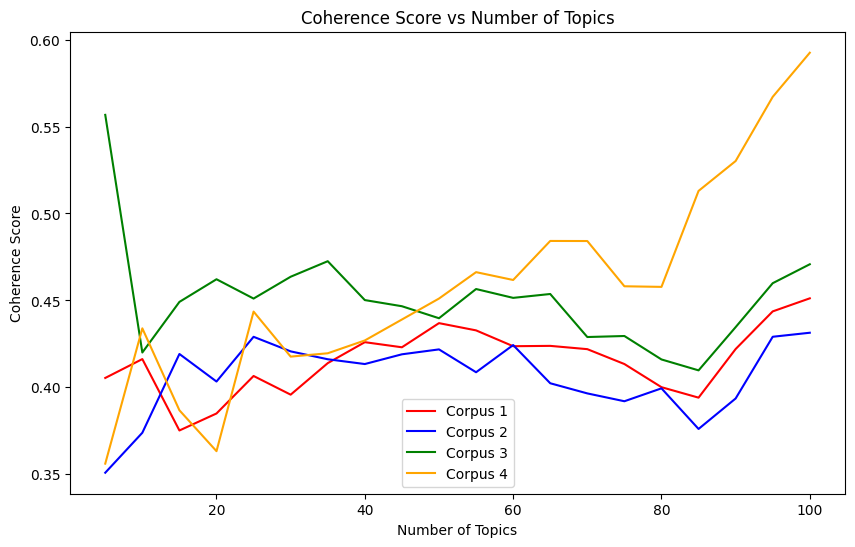

In [ ]:
#np.random.seed(76543)

# Список датасетов
datasets = [texts, texts2, texts3, texts4]

colors = ['red', 'blue', 'green', 'orange']  # список цветов для каждого датасета

start = 5
end = 105
step = 5
num_topics_range = range(start, end, step)

# Списки для хранения значений когерентности и оптимальных топиков
coherence_values_list = []
optimal_topics_list = []

for dataset in datasets:
    coherence_values = []
    optimal_topics = {'coherence': 0, 'num_topics': 0}

    dictionary = corpora.Dictionary(dataset)
    dictionary.filter_extremes(no_below=10)
    dictionary.compactify()
    corpus = [dictionary.doc2bow(text) for text in dataset]
    tfidf_model = TfidfModel(corpus)
    corpus_tfidf = tfidf_model[corpus]

    for num_topics in tqdm(num_topics_range):
        model  = LdaModel(corpus=corpus_tfidf, id2word=dictionary, num_topics=num_topics,  passes=10, chunksize = 500, alpha = 'auto', eta = 'auto', random_state = 100)
        coherence_model = CoherenceModel(model=model, texts=dataset, dictionary=dictionary, coherence='c_v')
        coherence_value = coherence_model.get_coherence()
        coherence_values.append(coherence_value)

        if coherence_value > optimal_topics['coherence']:
            optimal_topics['coherence'] = coherence_value
            optimal_topics['num_topics'] = num_topics

    coherence_values_list.append(coherence_values)
    optimal_topics_list.append(optimal_topics)

plt.figure(figsize=(10, 6))

for i in range(len(datasets)):
    plt.plot(num_topics_range, coherence_values_list[i], label=f"Corpus {i+1}", color=colors[i])

plt.xlabel('Number of Topics')
plt.ylabel('Coherence Score')
plt.title('Coherence Score vs Number of Topics')
plt.legend()
plt.show()

for i, optimal_topics in enumerate(optimal_topics_list):
    dataset_name = f"Dataset {i+1}"
    coherence_score = optimal_topics['coherence']
    num_topics = optimal_topics['num_topics']
    print(f"{dataset_name}: Optimal number of topics: {num_topics}, Coherence score: {coherence_score}")

In [10]:
#np.random.seed(76543)

dictionary = corpora.Dictionary(texts4)
dictionary.filter_extremes(no_below=10)
corpus = [dictionary.doc2bow(text) for text in texts4]
tfidf_model = TfidfModel(corpus)
corpus_tfidf = tfidf_model[corpus]

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [11]:
lda_model = LdaModel(corpus=corpus_tfidf, id2word=dictionary, per_word_topics =True, num_topics=100, passes=10, random_state = 100, chunksize = 10000, iterations = 100, alpha = 'symmetric', eta = 'symmetric')

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [12]:
coherence_model = CoherenceModel(model=lda_model, texts=texts4, dictionary=dictionary, coherence='c_v')
coherence_value = coherence_model.get_coherence()
print(coherence_value)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


0.5104615886564647


In [13]:
topics = lda_model.print_topics(num_topics=100)

for topic in topics:
    print(topic)

(0, '0.058*"голосование" + 0.032*"поправка_конституция" + 0.028*"цик" + 0.024*"поправка" + 0.022*"казахстан" + 0.021*"голосование_конституция" + 0.021*"сахалин" + 0.019*"проголосовать" + 0.018*"участок" + 0.016*"общероссийский_голосование"')
(1, '0.042*"йемен" + 0.032*"индекс" + 0.030*"соловьев" + 0.028*"хусит" + 0.022*"гуманитарный_помощь" + 0.019*"гуманитарный" + 0.015*"танкер" + 0.015*"совбез" + 0.013*"йеменский" + 0.012*"телеведущий_владимир_соловьев"')
(2, '0.020*"полицейский" + 0.019*"иркутский_область" + 0.016*"техас" + 0.016*"джордж_флойд" + 0.016*"афроамериканец" + 0.016*"пушок" + 0.013*"аптека" + 0.013*"диабет" + 0.012*"поджигать" + 0.011*"лопес"')
(3, '0.034*"вывоз" + 0.027*"антисептик" + 0.011*"изымать" + 0.011*"переживание" + 0.010*"овд" + 0.010*"гель" + 0.009*"спина" + 0.009*"ушиб" + 0.009*"украшение" + 0.009*"тромб"')
(4, '0.034*"коронавирус" + 0.030*"covid" + 0.023*"заболевание" + 0.023*"случай" + 0.022*"скончаться" + 0.018*"случай_заражение" + 0.017*"выздоравливать" + 

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [14]:
lda_model.show_topics(formatted=False)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


[(23,
  [('мошенник', 0.025416868),
   ('грузия', 0.020909013),
   ('полезный', 0.015439764),
   ('g20', 0.013361999),
   ('звонок', 0.013205604),
   ('блюдо', 0.0127470475),
   ('наука', 0.012060544),
   ('салат', 0.009638479),
   ('продукт', 0.009456748),
   ('мобильный_телефон', 0.009122688)]),
 (0,
  [('голосование', 0.057721067),
   ('поправка_конституция', 0.032243975),
   ('цик', 0.027976116),
   ('поправка', 0.024341786),
   ('казахстан', 0.021620546),
   ('голосование_конституция', 0.021166725),
   ('сахалин', 0.020618942),
   ('проголосовать', 0.018554445),
   ('участок', 0.017930355),
   ('общероссийский_голосование', 0.016259482)]),
 (37,
  [('пожар', 0.0776993),
   ('пожарный', 0.024917385),
   ('корабль', 0.021102289),
   ('моряк', 0.01971571),
   ('катер', 0.017742427),
   ('огонь', 0.016338924),
   ('черноморский_флот', 0.01272898),
   ('адмирал', 0.012245236),
   ('гореть', 0.011081732),
   ('доставлять_больница', 0.011013341)]),
 (59,
  [('хакер', 0.01706638),
   ('зл

In [15]:
cols = [color for name, color in mcolors.TABLEAU_COLORS.items()] * 20
cloud = WordCloud(background_color='white',
                  width=2500,
                  height=1800,
                  max_words=10,
                  colormap='tab10',
                  color_func=lambda *args, **kwargs: cols[i],
                  prefer_horizontal=1.0)
topics = lda_model.show_topics(num_topics = 100, formatted=False)

fig, axes = plt.subplots(50, 2, figsize=(10,100), sharex=True, sharey=True)
for i, ax in enumerate(axes.flatten()):
    fig.add_subplot(ax)
    topic_words = dict(topics[i][1])
    cloud.generate_from_frequencies(topic_words, max_font_size=300)
    plt.gca().imshow(cloud)
    plt.gca().set_title('Topic ' + str(i), fontdict=dict(size=16))
    plt.gca().axis('off')
plt.subplots_adjust(wspace=0, hspace=0)
plt.axis('off')
plt.margins(x=0, y=0)
plt.tight_layout()
plt.show()

Output hidden; open in https://colab.research.google.com to view.

Распределение количества документов по темам

In [ ]:
def format_topics_sentences(ldamodel=None, corpus=corpus_tfidf, texts=fulltexts4):
    sent_topics = []
    for i, row_list in enumerate(ldamodel[corpus]):
        row = row_list[0] if ldamodel.per_word_topics else row_list
        row = sorted(row, key=lambda x: (x[1]), reverse=True)
        for j, (topic_num, prop_topic) in enumerate(row):
            if j == 0:
                wp = ldamodel.show_topic(topic_num)
                topic_keywords = ", ".join([word for word, prop in wp])
                sent_topics.append({'Dominant_Topic': int(topic_num), 'Perc_Contribution': round(prop_topic, 4), 'Topic_Keywords': topic_keywords})
            else:
                break
    sent_topics_df = pd.DataFrame(sent_topics)
    contents = pd.Series(texts)
    sent_topics_df = pd.concat([sent_topics_df, contents], axis=1)
    return sent_topics_df

df_topic_sents_keywords = format_topics_sentences(ldamodel=lda_model, corpus=corpus_tfidf, texts=fulltexts4)
df_dominant_topic = df_topic_sents_keywords.reset_index()
df_dominant_topic.columns = ['Document_No', 'Dominant_Topic', 'Topic_Perc_Contrib', 'Keywords', 'Text']

topic_counts = df_topic_sents_keywords.groupby('Dominant_Topic').size().reset_index(name='Count')

plt.figure(figsize=(23, 6))
bars = plt.bar(topic_counts['Dominant_Topic'], topic_counts['Count'], color='blue')

plt.xlabel('Dominant Topic Number')
plt.ylabel('Count')
plt.title('Document Count by Dominant Topic')

topics = sorted(df_topic_sents_keywords['Dominant_Topic'].unique())
plt.xticks(topics, [f'Topic {topic}' for topic in topics])

plt.show()

In [22]:
plt.figure(figsize=(23, 6))
bars = plt.bar(topic_counts['Dominant_Topic'], topic_counts['Count'], color='blue')

plt.xlabel('Dominant Topic Number')
plt.ylabel('Count')
plt.title('Document Count by Dominant Topic')

topics = sorted(df_topic_sents_keywords['Dominant_Topic'].unique())
plt.xticks(topics, [f'{topic}' for topic in topics])

plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Распределение количества документов по темам, при условии, что документ принадлежит своей доминантной теме, если его близость к теме > 0.3

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Document_No  Dominant_Topic  Topic_Perc_Contrib                                                                                          Keywords                                                                                                                                                   Text
0                0              50              0.4928        президент, украина, сша, страна, россия, глава, государство, украинский, лидер, переговоры  В 1930-е годы Советский Союз охватила лихорадка — в десятилетие бурной индустриализации повсюду гремели сообщения о новых трудовых подвигах просто...
4                4              31              0.3649  иран, полиция, сша, погибать, суд, задерживать, расследование, нападение, убийство, американский  Актер  Михаил Ефремов  систематически употреблял наркотики. Об этом сообщает  Telegram -канал RT. О том, что артист регулярно использует запрещенн...
8                8              57              0.3360     компания, работа, рубль, проект, получать, исследование, система, россия, становиться, ученый  Участники экспедиции на архипелаг Новая Земля в Арктике обнаружили новый пролив. Об этом сообщила пресс-служба Северного флота, передает  РИА Ново...
10              10              31              0.4043  иран, полиция, сша, погибать, суд, задерживать, расследование, нападение, убийство, американский  Прокурор Манон Риддербекс во время судебного заседания по делу сбитого в Донбассе летом 2014 года MH17 заявила, что компенсации родственникам поги...
12              12              55              0.3226             экономика, коронавирус, пандемия, рост, процент, мера, страна, кризис, кредит, доллар  Белоруссия с января по июль 2020 года глубже залезла в долги: внешний долг республики за семь месяцев вырос на 3,7 процента, до 17,8 миллиарда дол...
...            ...             ...                 ...                                                                                               ...                                                                                                                                                    ...
17686        17686              57              0.3229     компания, работа, рубль, проект, получать, исследование, система, россия, становиться, ученый  Сенатор  Алексей Пушков  прокомментировал в  твиттере  заявление генсека  НАТО   Йенса Столтенберга  о возможной встрече с  Владимиром Путиным . Р...
17689        17689              44              0.3282             респондент, певец, тюрьма, инстаграм, певица, карантин, дома, отпуск, выходной, отдых  Южно-Курильский  районный суд признал капитанов пяти японских рыболовных судов виновными в незаконной добыче биологических ресурсов. Им назначили ...
17690        17690              57              0.3485     компания, работа, рубль, проект, получать, исследование, система, россия, становиться, ученый  Госкорпорация  "Росатом"  в будущем году примет новую стратегию развития, говорится в новогоднем поздравлении генерального директора "Росатома"  А...
17692        17692              55              0.3163             экономика, коронавирус, пандемия, рост, процент, мера, страна, кризис, кредит, доллар  Наиболее  закредитованным  субъектом  Российской Федерации  является  Калмыкия , по объемам долга в среднем на человека лидируют северные регионы,...
17698        17698              57              0.3086     компания, работа, рубль, проект, получать, исследование, система, россия, становиться, ученый  Постановление о его празднование было принято 4 августа 2006 года Коллегией Федеральной службы по экологическому, технологическому и атомному надз...

[8157 rows x 5 columns]

Процент оставшихся строк: 46.09%


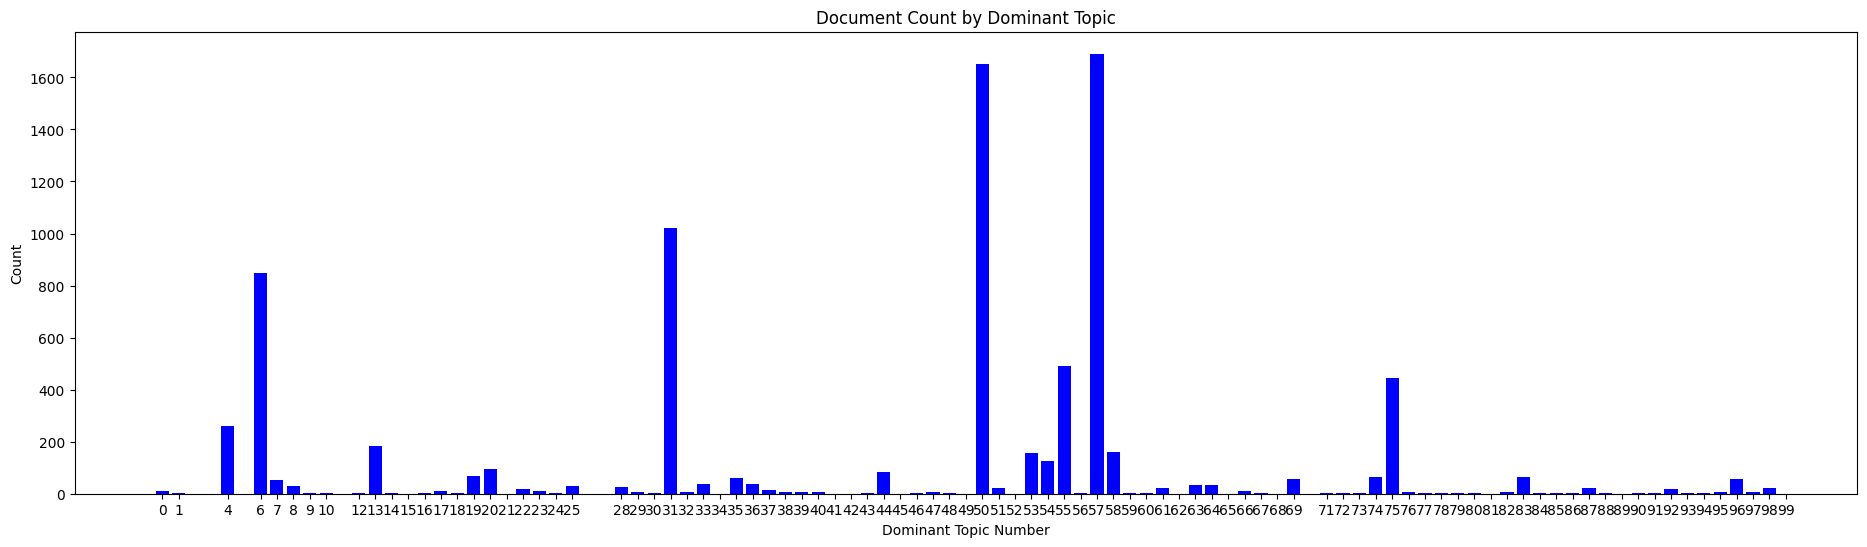

In [17]:
filtered_df = df_dominant_topic[df_dominant_topic['Topic_Perc_Contrib'] > 0.3]
display(filtered_df)
percentage_remaining = (len(filtered_df) / len(df_dominant_topic)) * 100
print(f"Процент оставшихся строк: {percentage_remaining:.2f}%")

topic_counts = filtered_df.groupby('Dominant_Topic').size().reset_index(name='Count')

plt.figure(figsize=(23, 6))
bars = plt.bar(topic_counts['Dominant_Topic'], topic_counts['Count'], color='blue')

plt.xlabel('Dominant Topic Number')
plt.ylabel('Count')
plt.title('Document Count by Dominant Topic')

topics = sorted(df_topic_sents_keywords['Dominant_Topic'].unique())
plt.xticks(topics, [f'{topic}' for topic in topics])

plt.show()

Получение представительных документов для каждого топика

In [18]:
representative_docs = filtered_df.groupby('Dominant_Topic').apply(lambda x: x.loc[x['Topic_Perc_Contrib'].idxmax()])

new_df = pd.DataFrame({
    'Topic_Num': representative_docs['Dominant_Topic'],
    'Keywords': representative_docs['Keywords'],
    'Topic_Perc_Contrib': representative_docs['Topic_Perc_Contrib'],
    'Text': representative_docs['Text']
})

display(new_df)
new_df.shape

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Topic_Num                                                                                                                                           Keywords  Topic_Perc_Contrib                                                                                                                                                   Text
Dominant_Topic                                                                                                                                                                                                                                                                                                                                         
0                       0  голосование, поправка_конституция, цик, поправка, казахстан, голосование_конституция, сахалин, проголосовать, участок, общероссийский_голосование              0.3627  Голосование по поправкам в Конституцию РФ на участках за пределами РФ, следует из календарного плана ЦИК. Как заявляла ранее председатель ЦИК  Элл...
1                       1                        йемен, индекс, соловьев, хусит, гуманитарный_помощь, гуманитарный, танкер, совбез, йеменский, телеведущий_владимир_соловьев              0.3731  Разлив нефти с танкера SAFER, на котором находится 1,1 миллиона баррелей черного золота, повлечет ужасные страдания для жителей  Йемена , катастро...
4                       4                              коронавирус, covid, заболевание, случай, скончаться, случай_заражение, выздоравливать, выявлять, заражать, заболевать              0.7445  Число подтвержденных случаев заражения  коронавирусом  нового типа в мире превысило 13 миллионов, сообщает  Университет Джонса Хопкинса , который ...
6                       6                                                              коронавирус, covid, пациент, врач, вирус, больница, тест, заражать, заражаться, китай              0.8511  Федеральное бюро расследований  и Департамент национальной безопасности США заподозрили китайских хакеров в попытке украсть данные о вакцине проти...
7                       7                                                                  рейс, авиакомпания, полет, аэропорт, пассажир, мкс, самолет, борт, boeing, экипаж              0.6600  Пассажирский самолет авиакомпании Juneyao Airlines резко изменил маршрут и направился в китайский город Ухань, где была зафиксирована вспышка коро...
...                   ...                                                                                                                                                ...                 ...                                                                                                                                                    ...
94                     94                            норвегия, норвежский, хронический_заболевание, курение, журналистка, гипертония, фунт, жаркий_погода, сердце, курильщик              0.3213  Россиянам раскрыли главную опасность жары для здоровья: в первую очередь такая погода несет риск для страдающих сердечно-сосудистыми заболеваниями...
95                     95                                                 мэр, собянин, москва, москва_сергей_собянин, столица, москвич, пешеход, проезд, вводиться, поездка              0.5928  Мэр Москвы  Сергей Собянин  обязал граждан соблюдать в городе социальную дистанцию от других людей не менее чем в полтора метра. Об этом он  сообщ...
96                     96                                                             температура, градус, погода, змея, осадки, остров, ветер, европейский, дождь, холодный              0.5695  В Москве в ночь на 30 марта резко ухудшится погода, сообщил  ТАСС  научный руководитель Гидрометцентра России  Роман Вильфанд . По его словам, уже...
97                     97                           космонавт, гражданство, катастрофа, мурманский_область, крушение, авиакатастрофа, вертолет, корабль_союз, самолет, взлет              0.6234  Депутаты  Госдумы  8 февраля простилис

(79, 4)

Распределение среднего кол-ва слов в текстах по доминирующим топикам.

In [19]:
filtered_df['Text'] = filtered_df['Text'].str.split()
filtered_df['Word_Count'] = filtered_df['Text'].apply(len)
topic_stats = filtered_df.groupby('Dominant_Topic')['Word_Count'].mean().reset_index()

plt.figure(figsize=(23, 6))
plt.bar(topic_stats['Dominant_Topic'], topic_stats['Word_Count'])
plt.xlabel('Dominant Topic')
plt.ylabel('Mean Word Count')
plt.title('Mean Word Count by Dominant Topic')
plt.xticks(topic_stats['Dominant_Topic'])
plt.show()

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
<ipython-input-19-9fc47f9eaaf4>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  filtered_df['Text'] = filtered_df['Text'].str.split()
<ipython-input-19-9fc47f9eaaf4>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable

Вычисление близости текстов.

In [20]:
doc_topics_matrix = np.zeros((len(corpus_tfidf), lda_model.num_topics))

for i, doc in enumerate(corpus_tfidf):
    doc_topics = lda_model.get_document_topics(doc)
    for topic in doc_topics:
        topic_idx = topic[0]
        topic_prob = topic[1]
        doc_topics_matrix[i, topic_idx] = topic_prob

print("Размерность матрицы документов-тем:", doc_topics_matrix.shape)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


Размерность матрицы документов-тем: (17699, 100)


In [21]:
topic_document_matrix = doc_topics_matrix

doc_similarity_matrix = 1 - cosine_distances(topic_document_matrix)
print(doc_similarity_matrix.shape)


np.fill_diagonal(doc_similarity_matrix, 0)

data = []
for term_vector in range(10):
    i = random.randint(0, 17699)
    sim = np.max(doc_similarity_matrix[i])
    j = np.argmax(doc_similarity_matrix[i])
    data.append((i, fulltexts4[i], sim, j, fulltexts4[j]))

df = pd.DataFrame(data, columns=['Doc1_No','Doc1', 'Similarity', 'Doc2_No', 'Doc2'])
display(df)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
/usr/local/lib/python3.10/dist-packages/sklearn/utils/extmath.py:189: RuntimeWarning: invalid value encountered in matmul
  ret = a @ b


(17699, 17699)


Doc1_No                                                                                                                                                   Doc1  Similarity  Doc2_No                                                                                                                                                   Doc2
0    13463  Самопровозглашенная  Донецкая народная республика  закрыла границу с территорией, контролируемой властями  Украины , из-за угрозы распространения ...    0.913667     6734  Врио губернатора  Хабаровского края   Михаил Дегтярев  в Instagram сообщил, что Евгений Никонов из департамента здравоохранения  Москвы  займет в ...
1    12692  Наибольшую опасность  коронавирусная инфекция  представляет для беременных. Об этом в эфире шоу " Вечер с Владимиром Соловьевым " на канале "Росси...    0.906128     6099  Главный принцип медицины — не навреди. На вопрос о том, как провести операцию с минимальным стрессом для человека и избежать осложнений, ответили ...
2    17485  Российские  семьи в 2020 году смогут воспользоваться пакетом новых мер, направленных на поддержку рождаемости, правительство также приняло решение...    0.876337     1965  Дополнительную поддержку от государства в размере пяти тысяч рублей смогут получить почти 1,7 миллиона семей с детьми до трех лет. Об этом сообщил...
3     8192  Почитается последователями тибетского буддизма как  земное воплощение  Авалокитешвары или Ченрезига, бодхисаттвы сострадания и покровителя Тибета....    0.921284     8201  Период регистрации кандидатов в президенты стартует в Белоруссии 5 июля и продлится по 14 июля включительно, следует из графика ЦИК республики. Те...
4    13483  Глава Чечни  Рамзан Кадыров  провел в пятницу заседание оперштаба по борьбе с коронавирусом, где поручил проводить среди жителей разъяснительную р...    0.955433     8606  Отрасль производителей французского шампанского столкнулась с беспрецедентным экономическим кризисом из-за пандемии коронавируса, в этом году объе...
5    15103  Около 30 автобусных рейсов и внутрикраевые авиарейсы отменены в  Приморье  из-за снежного циклона, в крае выросло число ДТП. Ранее синоптики сообщ...    0.903015    15499  Премьер-министр Таиланда генерал  Прают Чан-Оча  вылетит утром в воскресенье в город Накхонратчасима, место проведения операции по обезвреживанию ...
6     3394  Православный бизнесмен, владелец  телеканала «Царьград»   Константин Малофеев , ответил скандальной телеведущей Алене Водонаевой, которая заявила ...    0.994133     6680  Россияне  в период самоизоляции стали проводить больше времени в Сети, в частности, смотреть фильмы на пиратских ресурсах, что чревато автозагрузк...
7    11758  На  самоизоляции  люди остались один на один со  своими "скелетами в шкафу"  –  чувствами и переживаниями, которые они обычно скрывают. Из-за этог...    0.879574     3975  «Норвич» на своем поле обыграл «Борнмут» в матче 23-го тура Английской премьер-лиги (АПЛ). Об этом сообщает корреспондент «Ленты.ру». Встреча прош...
8     3353  Представители стран  Евросоюза  провалили переговоры по долгосрочному бюджету ЕС на 2021-2027 годы. Об этом сообщил председатель  Европейского сов...    0.921854     7599  Без серьезной помощи со стороны государства туристическая отрасль в условиях строгих требований безопасности, связанных с угрозой распространения ...
9       69  Старший сын президента Белоруссии  Александра Лукашенко , первый вице-президент Национального олимпийского комитета  Виктор Лукашенко  раскрыл кор...    0.954912      575  Белоруссия усилит меры безопасности на границе с Россией в связи с задержанием бойцов частной военной компании (ЧВК) Вагнера. Об этом сообщает БЕЛ...

In [23]:
print('\nПерпелексия: ', lda_model.log_perplexity(corpus_tfidf))

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)



Перпелексия:  -35.53619690511286


In [24]:
vis_data = pyLDAvis.gensim.prepare(lda_model, corpus_tfidf, dictionary=dictionary)


pyLDAvis.display(vis_data)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)


In [27]:
tmp_fname = get_tmpfile("lda.model")
lda_model.save(tmp_fname)

loaded_model = LdaModel.load(tmp_fname)

/usr/local/lib/python3.10/dist-packages/ipykernel/ipkernel.py:283: DeprecationWarning: `should_run_async` will not call `transform_cell` automatically in the future. Please pass the result to `transformed_cell` argument and any exception that happen during thetransform in `preprocessing_exc_tuple` in IPython 7.17 and above.
  and should_run_async(code)
